<a href="https://colab.research.google.com/github/nilsugungor/deutsche-bahn-delays/blob/main/eda_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis of Deutsche Bahn Delays' Data

###Importing Data

In [7]:
import kagglehub

path = kagglehub.dataset_download("nokkyu/deutsche-bahn-db-delays")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'deutsche-bahn-db-delays' dataset.
Path to dataset files: /kaggle/input/deutsche-bahn-db-delays


In [8]:
import os

os.listdir(path)

['DBtrainrides.csv']

In [9]:
import pandas as pd

csv_file = os.path.join(path, "DBtrainrides.csv")
df = pd.read_csv(csv_file)

df.head()

,ID,line,path,eva_nr,category,station,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,info,arrival_delay_check,departure_delay_check
0,1573967790757085557-2407072312-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.767800,2024-07-08 00:00:00,2024-07-08 00:01:00,2024-07-08 00:03:00,2024-07-08 00:04:00,3,3,NaN,on_time,on_time
1,349781417030375472-2407080017-1,18,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.767800,NaN,2024-07-08 00:17:00,NaN,NaN,0,0,NaN,on_time,on_time
2,7157250219775883918-2407072120-25,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,8000406,4,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,52066,6.116475,50.770202,2024-07-08 00:03:00,2024-07-08 00:04:00,2024-07-08 00:03:00,2024-07-08 00:04:00,0,0,NaN,on_time,on_time
3,349781417030375472-2407080017-2,18,Aachen Hbf,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,NaN,NaN,0,0,NaN,on_time,on_time
4,1983158592123451570-2407080010-3,33,Herzogenrath|Kohlscheid,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,2024-07-08 00:20:00,2024-07-08 00:21:00,0,0,NaN,on_time,on_time


###Data Inspection

In [5]:
df.columns

Index(['ID', 'line', 'path', 'eva_nr', 'category', 'station', 'state', 'city',
       'zip', 'long', 'lat', 'arrival_plan', 'departure_plan',
       'arrival_change', 'departure_change', 'arrival_delay_m',
       'departure_delay_m', 'info', 'arrival_delay_check',
       'departure_delay_check'],
      dtype='object')

In [5]:
df.shape #rows, columns


(2061357, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061357 entries, 0 to 2061356
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   line                   object 
 2   path                   object 
 3   eva_nr                 int64  
 4   category               int64  
 5   station                object 
 6   state                  object 
 7   city                   object 
 8   zip                    int64  
 9   long                   float64
 10  lat                    float64
 11  arrival_plan           object 
 12  departure_plan         object 
 13  arrival_change         object 
 14  departure_change       object 
 15  arrival_delay_m        int64  
 16  departure_delay_m      int64  
 17  info                   object 
 18  arrival_delay_check    object 
 19  departure_delay_check  object 
dtypes: float64(2), int64(5), object(13)
memory usage: 314.5+ MB


In [7]:
df.isnull().sum() #checking null. values

,0
ID,0
line,0
path,211355
eva_nr,0
category,0
station,0
state,0
city,0
zip,0
long,0


In [10]:
df[['arrival_delay_m', 'departure_delay_m']].describe()

,arrival_delay_m,departure_delay_m
count,2.061357e+06,2.061357e+06
mean,1.176581e+00,1.223574e+00
std,3.407859e+00,3.418300e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00
max,1.590000e+02,1.590000e+02


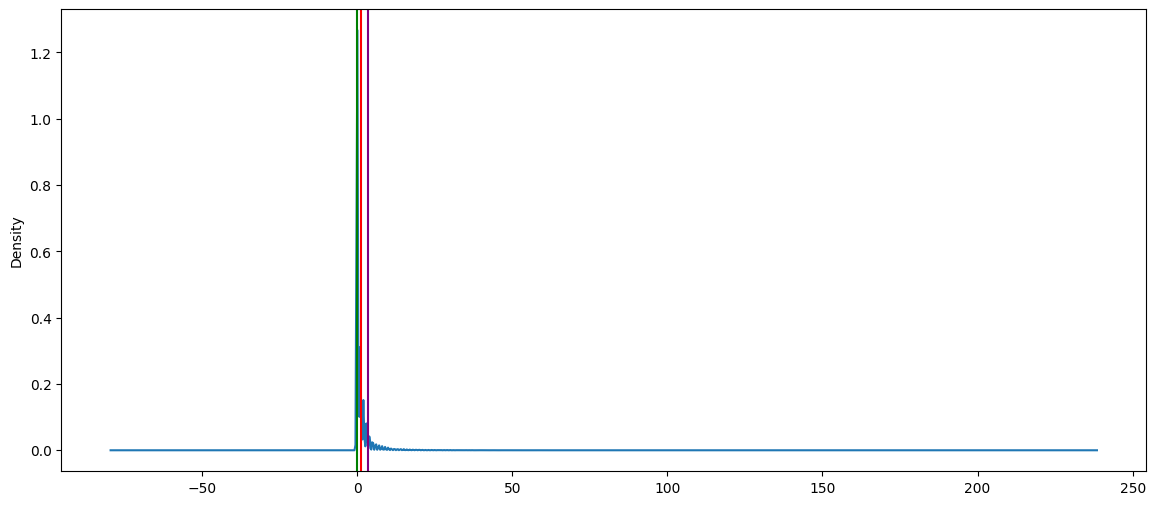

In [16]:
ax = df['departure_delay_m'].plot(kind='density', figsize=(14, 6))
ax.axvline(df['departure_delay_m'].mean(), color='red')
ax.axvline(df['departure_delay_m'].median(), color='green')
ax.axvline(df['departure_delay_m'].std(), color='purple')

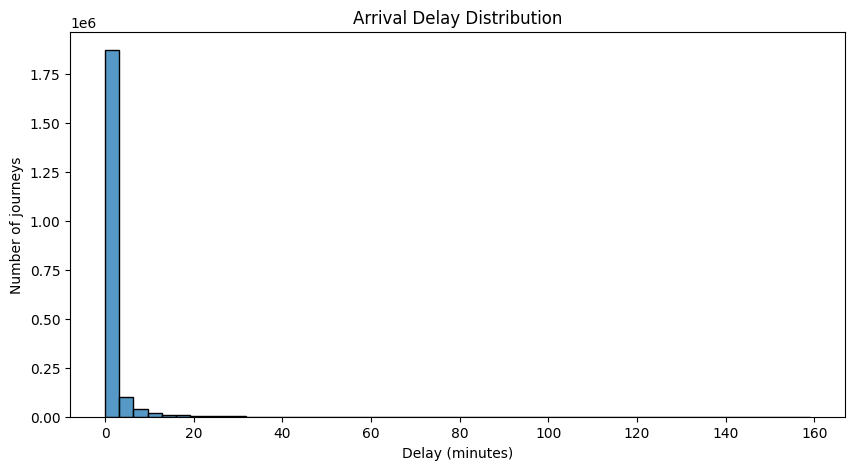

In [9]:
#arrival delays, most the trains are delayed less than 20 min
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['arrival_delay_m'], bins=50, kde=False)
plt.title("Arrival Delay Distribution")
plt.xlabel("Delay (minutes)")
plt.ylabel("Number of journeys")
plt.show()

###Station Category Frequency

<Axes: ylabel='count'>

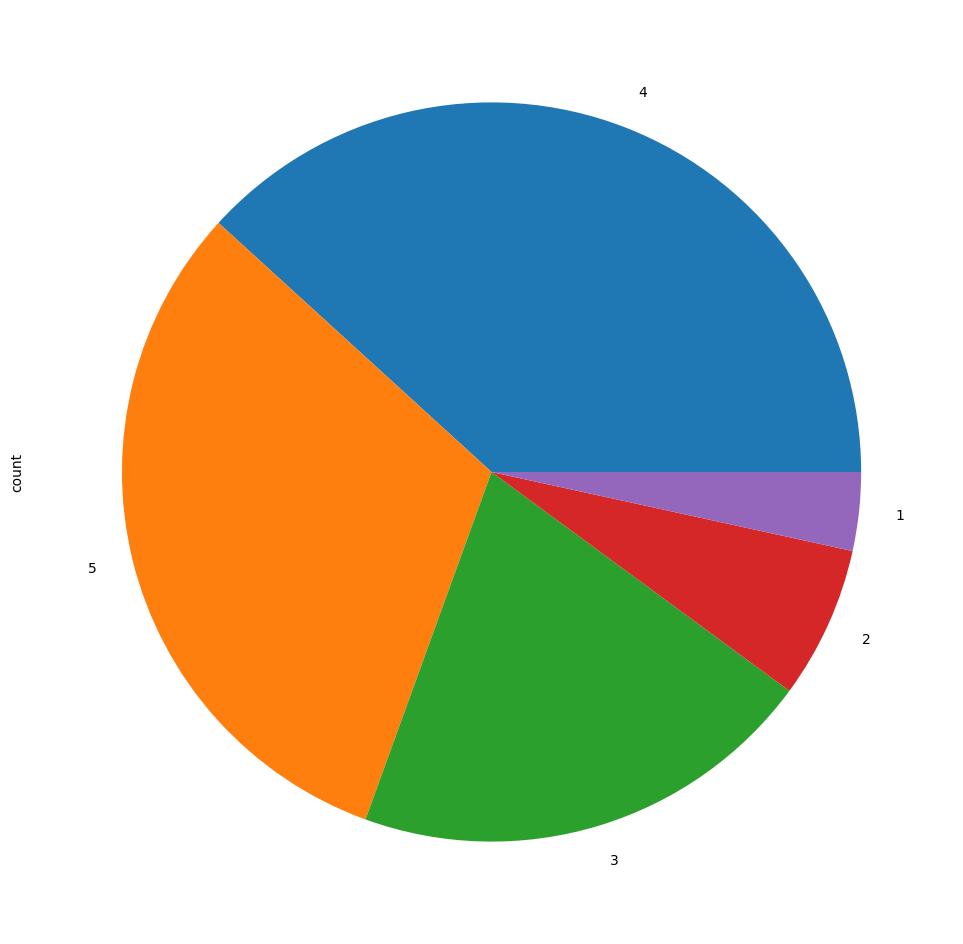

In [15]:
df['category'].value_counts().plot(kind='pie', figsize=(12, 12))

###Arrival Delay Frequency distributed by Station Category

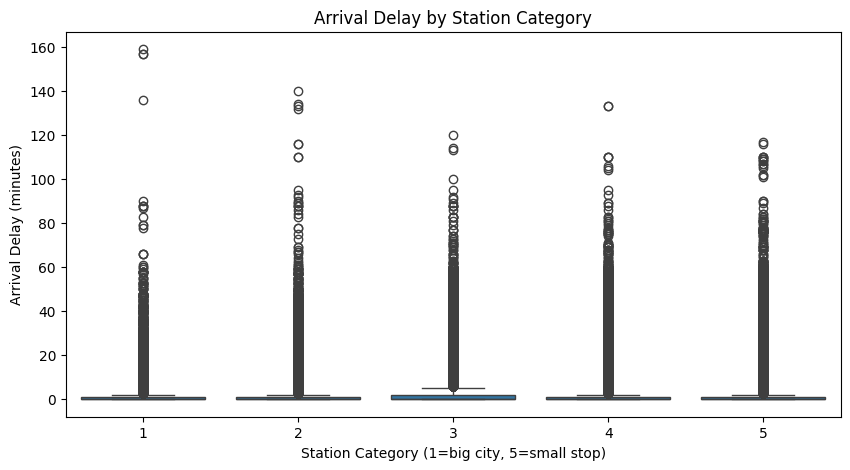

In [10]:
#comparing delays by station type, big cities delay time is more than small stops
plt.figure(figsize=(10,5))
sns.boxplot(x='category', y='arrival_delay_m', data=df)
plt.title("Arrival Delay by Station Category")
plt.xlabel("Station Category (1=big city, 5=small stop)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


In [11]:
df['category'].value_counts().sort_index()


,count
category,
1,70739
2,137222
3,421535
4,788039
5,643822


###Percentage of Delays

In [12]:
#31% of the trains are delayed
df['is_delayed'] = df['arrival_delay_m'] > 0
df['is_delayed'].value_counts(normalize=True)

,proportion
is_delayed,
False,0.682514
True,0.317486


In [13]:
#according to db's official delay rule, these are more than 6 minute delays which is 5%, so around 25% of the delays are less than 5 minutes
df['arrival_delay_check'].value_counts(normalize=True)

,proportion
arrival_delay_check,
on_time,0.946175
delay,0.053825


###Temporal Analysis of Delays

In [16]:
#changing string to datetime
df['arrival_plan'] = pd.to_datetime(df['arrival_plan'])

#extracting hour from the date column and creating a new hour column
df['hour'] = df['arrival_plan'].dt.hour

In [19]:
df.columns

Index(['ID', 'line', 'path', 'eva_nr', 'category', 'station', 'state', 'city',
       'zip', 'long', 'lat', 'arrival_plan', 'departure_plan',
       'arrival_change', 'departure_change', 'arrival_delay_m',
       'departure_delay_m', 'info', 'arrival_delay_check',
       'departure_delay_check', 'is_delayed', 'hour'],
      dtype='object')

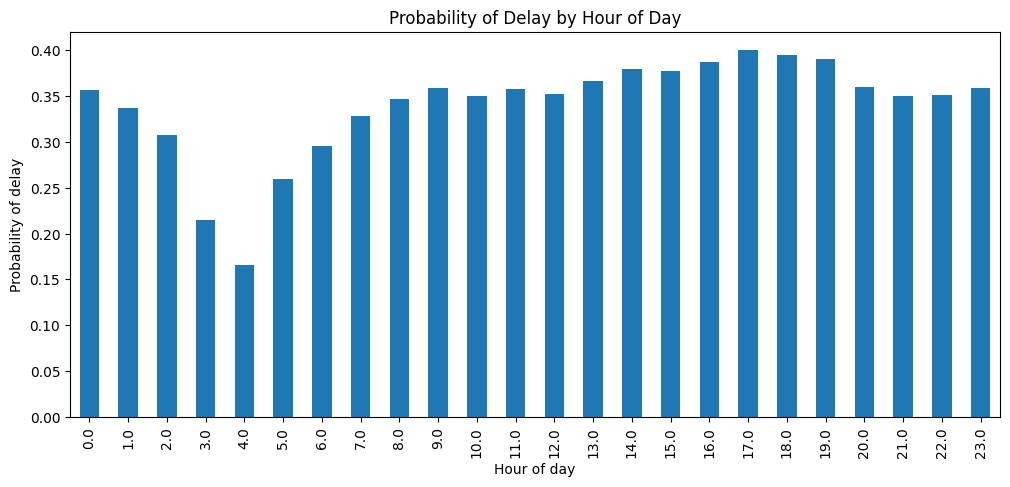

In [18]:
#between 16-19 are the worst times, during rush hours
df.groupby('hour')['is_delayed'].mean().plot(kind='bar', figsize=(12,5))
plt.title("Probability of Delay by Hour of Day")
plt.ylabel("Probability of delay")
plt.xlabel("Hour of day")
plt.show()


###Probability Analysis

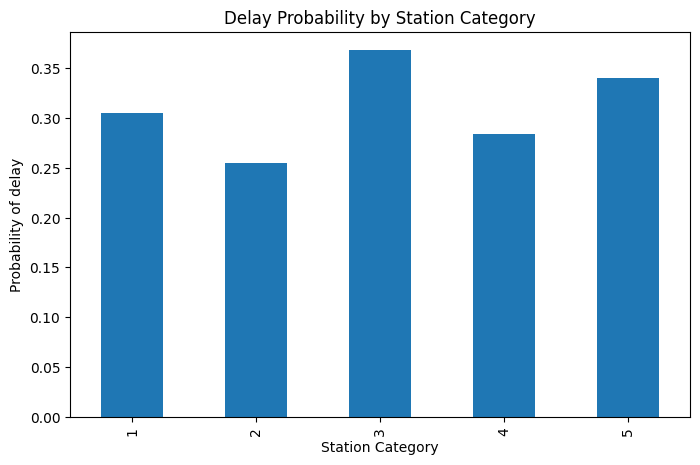

In [20]:
#most delays are in 3 categories, compared to bigger stations there is lack of better infrastructure therefore the delays
#and the next one is category 5, delays often propogate from earlier stops
df.groupby('category')['is_delayed'].mean().plot(
    kind='bar', figsize=(8,5)
)
plt.title("Delay Probability by Station Category")
plt.ylabel("Probability of delay")
plt.xlabel("Station Category")
plt.show()


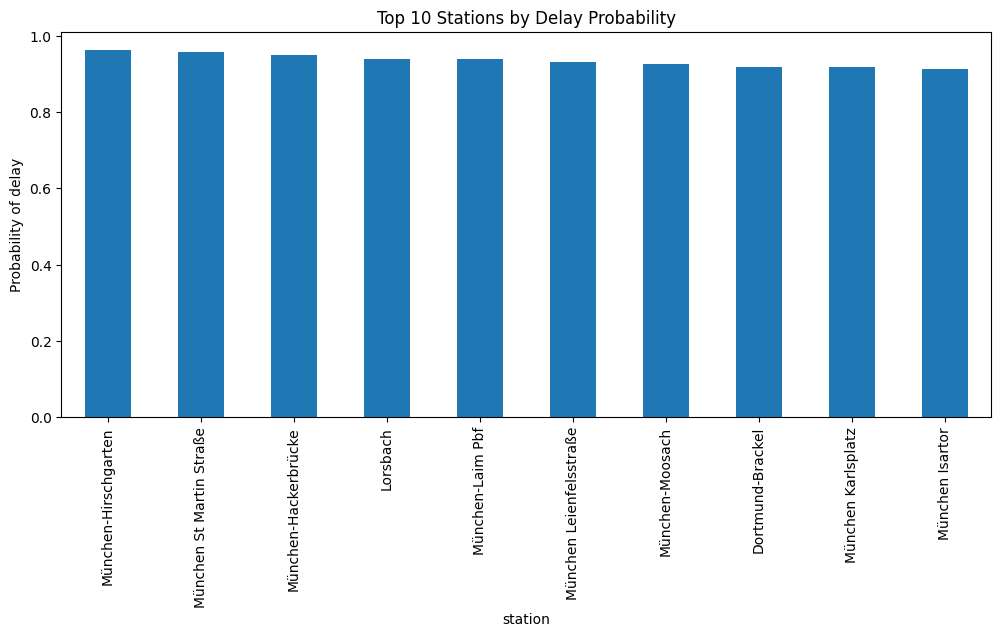

In [21]:
top_delayed_stations = (
    df.groupby('station')['is_delayed']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

top_delayed_stations.plot(kind='bar', figsize=(12,5))
plt.title("Top 10 Stations by Delay Probability")
plt.ylabel("Probability of delay")
plt.show()


In [23]:
(
    df.groupby('station')
      .agg(
          delay_prob=('is_delayed', 'mean'),
          count=('is_delayed', 'size')
      )
      .sort_values('delay_prob', ascending=False)
      .head(10)
)
#münchen may have tight schedules and less recovery opportunities

,delay_prob,count
station,,
München-Hirschgarten,0.963364,6551
München St Martin Straße,0.958866,1799
München-Hackerbrücke,0.950176,7366
Lorsbach,0.939394,594
München-Laim Pbf,0.939240,6682
München Leienfelsstraße,0.931151,886
München-Moosach,0.927616,1644
Dortmund-Brackel,0.920228,702
München Karlsplatz,0.919584,7598


In [26]:
station_counts = df.groupby('station')['is_delayed'].size().sort_values(ascending=False)
print(station_counts)
#nothing wrong with the sample sizes

station
München Donnersbergerbrücke    8732
Berlin-Westkreuz               8312
München Ost                    7814
München Karlsplatz             7598
München Isartor                7382
                               ... 
Norddeich Mole                   95
St. Georgen (Schwarzw)           74
Seubersdorf                      49
Neubrandenburg                    5
Berlin-Karlshorst                 5
Name: is_delayed, Length: 1996, dtype: int64


In [24]:
df.groupby('station').agg(
    delay_prob=('is_delayed', 'mean'),
    avg_delay=('arrival_delay_m', 'mean'),
    p90_delay=('arrival_delay_m', lambda x: x.quantile(0.9)),
    count=('arrival_delay_m', 'size')
).sort_values('delay_prob', ascending=False).head(10)
#there are a lot of delays in these stations, however delays are average 2-3 minutes, more of a systemic problem

,delay_prob,avg_delay,p90_delay,count
station,,,,
München-Hirschgarten,0.963364,3.295375,6.0,6551
München St Martin Straße,0.958866,2.441356,4.0,1799
München-Hackerbrücke,0.950176,2.829080,5.0,7366
Lorsbach,0.939394,2.707071,7.0,594
München-Laim Pbf,0.939240,2.858875,5.0,6682
München Leienfelsstraße,0.931151,1.890519,4.0,886
München-Moosach,0.927616,2.315085,5.0,1644
Dortmund-Brackel,0.920228,1.330484,2.0,702
München Karlsplatz,0.919584,3.279021,5.0,7598


###Departure Delay & Arrival Delay Comparison

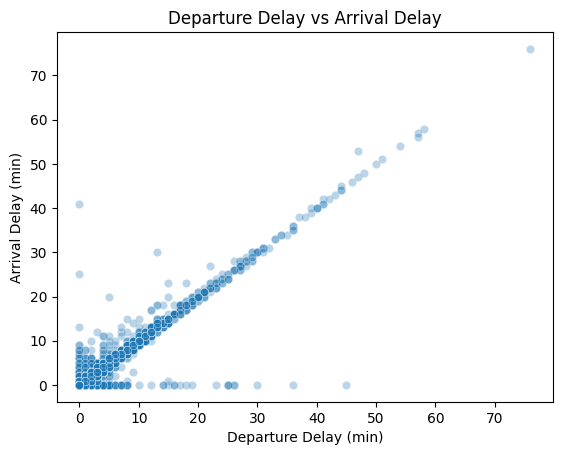

In [22]:
#strong relationship, if a train leaves late, it arrives late as well, delays propagate
sns.scatterplot(
    x='departure_delay_m',
    y='arrival_delay_m',
    data=df.sample(20000),
    alpha=0.3
)
plt.title("Departure Delay vs Arrival Delay")
plt.xlabel("Departure Delay (min)")
plt.ylabel("Arrival Delay (min)")
plt.show()

In [25]:
df[['departure_delay_m', 'arrival_delay_m']].corr()
#extremely strong correlation

,departure_delay_m,arrival_delay_m
departure_delay_m,1.000000,0.955704
arrival_delay_m,0.955704,1.000000


###Severity and Frequency of Delays

In [29]:
df.groupby('station').agg(
    delay_prob=('is_delayed', 'mean'),
    avg_delay=('arrival_delay_m', 'mean'),
    count=('arrival_delay_m', 'size')
).sort_values('avg_delay', ascending=False).head(10)
#stations with rare and severe delays, trains are usually on time, but if there is a delay then it is a lot. avg delay on 4-5 min

,delay_prob,avg_delay,count
station,,,
Steinau (Straße),0.660377,6.169811,265
Flieden,0.450644,5.785408,233
Langenselbold,0.512605,5.266807,476
St. Goar,0.891975,5.120370,324
Neuhof (Kr Fulda),0.425676,4.993243,296
Bad Soden-Salmünster,0.535604,4.975232,323
Prenzlau,0.697183,4.760563,284
Sonthofen,0.881857,4.698312,474
Schlüchtern,0.503856,4.694087,389


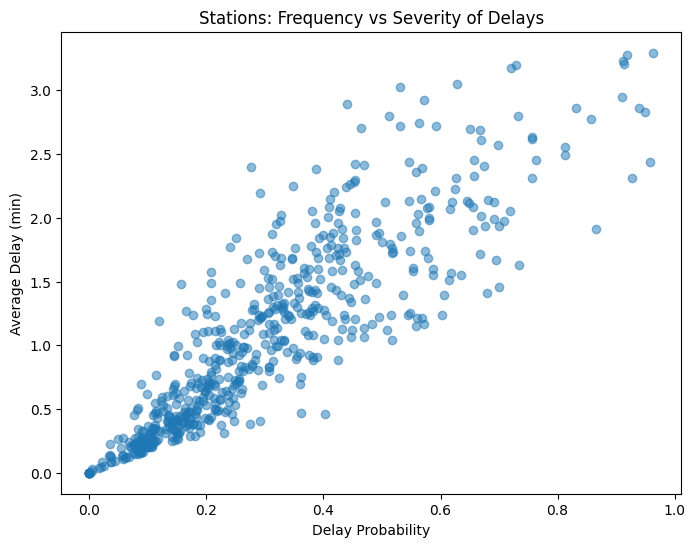

In [28]:
station_stats = df.groupby('station').agg(
    delay_prob=('is_delayed', 'mean'),
    avg_delay=('arrival_delay_m', 'mean'),
    count=('arrival_delay_m', 'size')
)

filtered = station_stats[station_stats['count'] > 1000]

plt.figure(figsize=(8,6))
plt.scatter(filtered['delay_prob'], filtered['avg_delay'], alpha=0.5)
plt.xlabel("Delay Probability")
plt.ylabel("Average Delay (min)")
plt.title("Stations: Frequency vs Severity of Delays")
plt.show()
#postive trend, however still delays accured are significantly short